In [6]:
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb, ZScaleInterval
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import astroalign as aa
import numpy as np

In [26]:
output_dir = 'imgs/science/calibrated/aligned/colored/'
data_dir = 'imgs/science/calibrated/aligned/'
# Read in the three images downloaded from here:
h_name = data_dir+'Ha_final_image.fits'
r_name = data_dir+'R_final_image.fits'
o_name = data_dir+'Oiii_final_image.fits'
b_name = data_dir+'B_final_image.fits'

In [64]:
image_h = fits.open(r_name)[0].data
image_r = fits.open(h_name)[0].data
image_g = fits.open(b_name)[0].data
image_b = fits.open(o_name)[0].data

image_h = image_h/np.median(image_h)
image_r = image_r/np.median(image_r)
image_g = image_g/np.median(image_g)
image_b = image_b/np.median(image_b)


reg_g, fp_g = aa.register(image_g,image_r)
reg_b, fp_b = aa.register(image_b,image_r)
reg_h, fp_h = aa.register(image_h,image_r)

image_g = reg_g
image_b = reg_b
image_h = reg_h

#image_r = treat_image(image_r)
#image_g = treat_image(reg_g)
#image_b = treat_image(reg_b)


image_r = image_r/np.median(image_r)
image_g = image_g/np.median(image_g)
image_b = image_b/np.median(image_b)


image_r = image_r + image_h
image_g = image_g + image_h

image_b = image_b + image_h




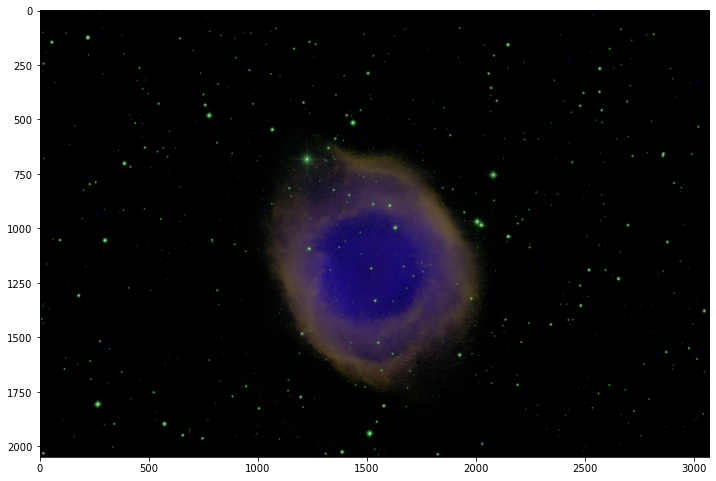

In [65]:
image = make_lupton_rgb(image_r, image_g, image_b, Q=15,minimum=2.1, stretch=0.5)

plt.figure(figsize=(12,12))
plt.imshow(image)

(array([5.200000e+01, 8.740000e+02, 4.553060e+05, 4.311957e+06,
        1.062215e+06, 2.346370e+05, 1.751000e+05, 4.100900e+04,
        7.253000e+03, 1.025000e+03, 2.430000e+02, 1.800000e+02,
        1.530000e+02, 1.220000e+02, 8.600000e+01, 7.200000e+01,
        7.900000e+01, 5.900000e+01, 5.800000e+01, 6.100000e+01,
        4.800000e+01, 3.300000e+01, 3.200000e+01, 3.000000e+01,
        3.100000e+01, 3.000000e+01, 2.500000e+01, 2.500000e+01,
        3.100000e+01, 2.500000e+01, 1.500000e+01, 1.500000e+01,
        2.200000e+01, 1.500000e+01, 1.900000e+01, 1.400000e+01,
        9.000000e+00, 1.500000e+01, 1.800000e+01, 9.000000e+00,
        8.000000e+00, 1.100000e+01, 1.400000e+01, 1.000000e+01,
        8.000000e+00, 1.100000e+01, 7.000000e+00, 5.000000e+00,
        7.000000e+00, 5.000000e+00, 1.000000e+01, 7.000000e+00,
        1.100000e+01, 8.000000e+00, 7.000000e+00, 1.100000e+01,
        5.000000e+00, 5.000000e+00, 6.000000e+00, 4.000000e+00,
        4.000000e+00, 8.000000e+00, 5.00

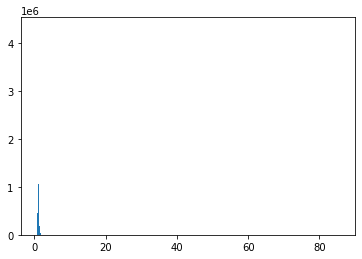

In [24]:
plt.hist(image_b.flatten(),bins=500)

In [21]:
print(np.min(image_r),np.mean(image_r),np.max(image_r))

0.40576705 1.016987 104.17073


In [63]:
print(np.min(image_g),np.mean(image_g),np.max(image_g))

0.9377734 1.0044463 1.0976452


In [64]:
print(np.min(image_b),np.mean(image_b),np.max(image_b))

0.9089438 1.0012615 1.1884469
